# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Homework 3: Due Tuesday 8 November 2022 (11:59pm) </center>
### <center> Version 1.0 (Last Modified: 29 October 2022) </center>

---
## Instructions


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: A Small Neural Network (30 points)
    - Problem 1.1: Forward Pass (10 points)
    - Problem 1.2: Evaluate Loss (10 points)
    - Problem 1.3: Network Size (10 points)
- Problem 2: Neural Networks in Code (65 points)
    - Problem 2.1: Setting up Data (5 points)
    - Problem 2.2: Vary Amount of Data (20 points)
    - Problem 2.3: Learning Curves (10 points)
    - Problem 2.3: Tuning your Neural Network (30 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

---
## Problem 1: A Small Neural Network


Consider the small neural network given in the image below, which will classify a 3-dimensional feature vector $\mathbf{x}$ into one of three classes ($y = 0, 1, 2$). You are given an input to this network $\mathbf{x}$, as well as weights $W$ for the hidden layer and weights $B$ for the output layer. For example, $w_{12}$ is the weight connecting input $x_1$ to hidden unit $h_2$. This network uses the ReLU activation function for the hidden layer, and uses the softmax activation function for the output layer. 

<img src="hw3_nn.png" width=500 height=400 />

$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \\ -2 \end{bmatrix}
$$

$$
W = \begin{bmatrix} 
    w_{01} & w_{11} & w_{21} & w_{31} \\ 
    w_{02} & w_{12} & w_{22} & w_{32} \\
    \end{bmatrix} =
    \begin{bmatrix} 
    1 & -1 & 0 & 6 \\ 
    2 & 1 & 1 & 3 \\
    \end{bmatrix}
$$

$$
B = \begin{bmatrix} 
    \beta_{01} & \beta_{11} & \beta_{21} \\
    \beta_{02} & \beta_{12} & \beta_{22} \\
    \beta_{03} & \beta_{13} & \beta_{23} \\
    \end{bmatrix} =
    \begin{bmatrix}
    6 & -1 & 0 \\
    5 & 0 & 2 \\
    2 & 1 & 1
    \end{bmatrix}
$$

### Problem 1.1 (10 points): Forward Pass
- Given the inputs and weights above, compute the values of the hidden units $h_1, h_2$ and the outputs $f_1, f_2, f_2$. You should do this by hand, i.e. you should not write any code to do the calculation, but feel free to use a calculator to help you do the computations.
    - You can optionally use $\LaTeX$ in your answer on the Jupyter notebook. Otherwise, write your answer on paper and include a picture of your answer in this notebook. In order to include an image in Jupyter notebook, save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. Alternatively, you may go to Edit --> Insert Image at the top menu to insert an image into a Markdown cell. **Double check that your image is visible in your PDF submission.**
- What class would the network predict for the input $\mathbf{x}$?


$
h_1 = w_0 \cdot x = 1 * 1 + 3 * -1 + -2 * 0 + 1 * 6 = 1 - 3 + 0 + 6 = 4 \\
h_2 = w_1 \cdot x = 1 * 2 + 3 * 1 + -2 * 1 + 1 * 3 = 2 + 3 - 2 + 3 = 6 \\
$ 

$
f_1 = \beta_0 \cdot h = 4 * 6 + 6 * -1 + 1 * 0 = 24 - 6 + 0 = 18 \\ 
f_2 = \beta_1 \cdot h = 4 * 5 + 6 * 5 + 1 * 2 = 20 + 0 + 2 = 22 \\ 
f_3 = \beta_2 \cdot h = 4 * 2 + 6 * 1 + 1 * 1 = 8 + 6 + 1 = 15 $

$
softmax([18, 22, 15]) = [0.018, 0.981, 0.001]\\
p(y=0) = 0.018  \\
p(y=1) = 0.981  \\
p(y=2) = 0.001  \\
$

The network will predict y = 1

### Problem 1.2 (10 points): Evaluate Loss
Typically when we train neural networks for classification, we seek to minimize the log-loss function. Note that the output of the log-loss function is always greater than zero, but can be arbitrarily large (you should pause for a second and make sure you understand why this is true).

- Suppose the true label for the input $\mathbf{x}$ is $y = 1$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?
- Suppose instead that the true label for the input $\mathbf{x}$ is $y = 2$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?

You are free to use numpy / Python to help you calculate this, but don't use any neural network libraries that will automatically calculate the loss for you.

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

f = [18, 22, 15]
p = softmax(f)
print("Probability of p(y = y_i) is", p)

print("Loss when y = 1 is", -np.log(p[1]))
print("Loss when y = 2 is", -np.log(p[2]))

Probability of p(y = y_i) is [0.018 0.981 0.001]
Loss when y = 1 is 0.01904500787925745
Loss when y = 2 is 7.0190450078792574


### Problem 1.3 (10 points): Network Size
- Suppose we change our network so that there are $12$ hidden units instead of $2$. How many total weights and biases would there be in our new network?

In [3]:
N = 3   # number of features
h_w = 3 * 12 # (features + bias term) * number of hidden unit
print("Number of weight for hidden layer =", h_w)

f_w = 12 * 3 # (number of hidden unit + bias term) * number of classes
print("Number of weight for output layer =", f_w)

print("Total number of weights for a 12 hidden unit NN =", h_w + f_w)
print("Total number of bias =", 12 + 3)

Number of weight for hidden layer = 36
Number of weight for output layer = 36
Total number of weights for a 12 hidden unit NN = 72
Total number of bias = 15


---
## Problem 2: Neural Networks in Code

In the second problem of this assignment, you will get some hands-on experience working with neural networks. We will be using the scikit-learn implementation of a multi-layer perceptron (MLP). See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for the corresponding documentation. Although there are specialized Python libraries for neural networks, like [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/), we'll stick with scikit-learn as you're already familiar with this library.

In this problem, we'll be working with the MNIST dataset, which we already saw in Homework 1. As a reminder, this is an image classification dataset, where each image is a hand-written digit. Take a look at Homework 1 to remind yourself what this dataset looks like.

### Problem 2.1: Setting up the data (5 points)

First, we'll load our dataset and split it into a training set and a testing set. You are already given code that does this for you, and you only need to run it.

- Use the scikit-learn class `StandardScaler` to standardize both the training and testing features. Remember that you should only fit the `StandardScaler` on the training data, and *not* the testing data.

In [4]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# Convert labels to integer data type
y = y.astype(int)

In [5]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, 
                                          random_state=seed, shuffle=True)

In [6]:
scaler = StandardScaler().fit(X_tr)
X_tr, X_te = scaler.transform(X_tr), scaler.transform(X_te)

### Problem 2.2: Varying the amount of training data (20 points)
One reason that neural networks have become popular in recent years is that, for many problems, we now have access to very large datasets. Since neural networks are very flexible models, they are often able to take advantage of these large datasets in order to achieve high levels of accuracy. In this problem, you will vary the amount of training data available to a neural network and see what effect this has on the model's performance.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD) and a learning rate of $0.001$
- Use a batch size of 256
- **Make sure to set `random_state=seed`.**

Your task is to implement the following:
- Train an MLP model (with the above hyperparameter settings) using the first `n_tr` feature vectors in `X_tr`, where `n_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]`. You should use the `MLPClassifier` class from scikit-learn in your implementation.
- Train a logistic regression classifier (with the default settings in sklearn) using the first `n_tr` feature vectors in `X_tr`, where `n_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]` .You should use the `LogisticRegression` class from scikit-learn in your implementation. **Make sure to use the argument `random_state=seed` for reproducibility.**
- Create a plot of the training error and testing error for both the logistic regression and MLP models as a function of the number of training data points. Be sure to include an x-label, y-label, and legend in your plot. Use a log-scale on the x-axis. Give a short (one or two sentences) description of what you see in your plot.

Note that training a neural network with a lot of data can be a slow process. Hence, you should be careful to implement your code such that it runs in a reasonable amount of time. One recommendation is to test your code using only a small subset of the given `n_tr` values, and only run your code with all of the `n_tr` values given once you are certain your code is working.

In [7]:
n_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]

mlp_train_error = []
mlp_test_error = []
logistic_train_error = []
logistic_test_error = []

for n in n_tr:
    # train both models
    mlp = MLPClassifier(hidden_layer_sizes=(64,), activation="relu", 
                        solver="sgd", learning_rate_init=0.001, 
                        batch_size=256, 
                        random_state=seed).fit(X_tr[:n], y_tr[:n])
    logistic = LogisticRegression().fit(X_tr[:n], y_tr[:n])

    mlp_train_error.append(
        1 - accuracy_score(y_tr, mlp.predict(X_tr)))
    mlp_test_error.append(
        1 - accuracy_score(y_te, mlp.predict(X_te)))

    logistic_train_error.append(
        1 - accuracy_score(y_tr, logistic.predict(X_tr)))
    logistic_test_error.append(
        1 - accuracy_score(y_te, logistic.predict(X_te)))


Text(0.5, 1.0, 'Error rate on testing data')

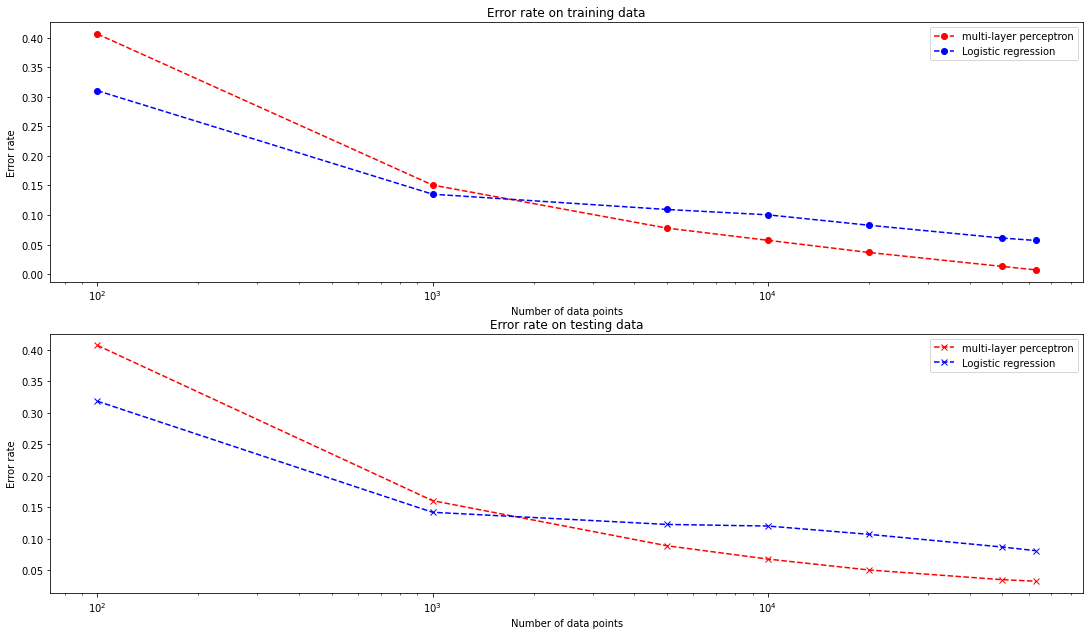

In [8]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(2, 1, 1)

ax.plot(n_tr, mlp_train_error, linestyle='dashed', marker='o', 
        color="red", label="multi-layer perceptron")
ax.plot(n_tr, logistic_train_error, linestyle='dashed', marker='o', 
        color="blue", label="Logistic regression")
ax.set_xscale('log')
ax.legend()
plt.xlabel("Number of data points")
plt.ylabel("Error rate")
ax.set_title("Error rate on training data")

ax = fig.add_subplot(2, 1, 2)
ax.plot(n_tr, mlp_test_error, linestyle='dashed', marker='x', 
        color="red", label="multi-layer perceptron")
ax.plot(n_tr, logistic_test_error, linestyle='dashed', marker='x', 
        color="blue", label="Logistic regression")
ax.set_xscale('log')
ax.legend()
plt.xlabel("Number of data points")
plt.ylabel("Error rate")
ax.set_title("Error rate on testing data")

In general, multi-layer perceptron performs worse than logistic regression when number of data points is small and better when number of data points is big

---
### Problem 2.3: Learning Curves (10 points)

One hyperparameter that can have a significant effect on the performance of your model is the learning rate, which controls the step size in (stochastic) gradient descent. In this problem you will vary the learning rate to see what effect this has on how quickly training converges as well as the effect on the performance of your model.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD)
- Set `n_iter_no_change=100` and `max_iter=100`. This ensures that all of your networks in this problem will train for 100 epochs (an *epoch* is one full pass over the training data).
- Use a batch size of 256
- **Make sure to set `random_state=seed`.**

Your task is to:
- Train a neural network with the above settings, but vary the learning rate in `lr = [0.0005, 0.001, 0.005, 0.01]`.
- Create a plot showing the loss on the training set as a function of the training epoch (i.e. the x-axis corresponds to training iterations) for each learning rate above. You should have a single plot with four curves. Make sure to include an x-label, a y-label, and a legend in your plot. (Hint: `MLPClassifier` has an attribute `loss_curve_` that you likely find useful.)
- Include a short description of what you see in your plot.

**Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. In the following cell, you are provided a few lines of code that will create a small training set (with the first 10,000 images in `X_tr`) and a validation set (with the second 10,000 images in `X_tr`). You will use the validation later in Problem 2.4. 

In [9]:
# Create validation sets from the second 10k images in X_tr
X_val = X_tr[10000:20000]
y_val = y_tr[10000:20000]

# Create a smaller training set with the first 10k images in X_tr
X_tr = X_tr[:10000]
y_tr = y_tr[:10000]

In [10]:
lrs = [0.0005, 0.001, 0.005, 0.01]

mlp0 = MLPClassifier(hidden_layer_sizes=(64,), activation="relu", 
                     solver="sgd", learning_rate_init=lrs[0], 
                     batch_size=256, random_state=seed, 
                     n_iter_no_change=100, max_iter=100).fit(X_tr, y_tr)
mlp1 = MLPClassifier(hidden_layer_sizes=(64,), activation="relu", 
                     solver="sgd", learning_rate_init=lrs[1], 
                     batch_size=256, random_state=seed, 
                     n_iter_no_change=100, max_iter=100).fit(X_tr, y_tr)
mlp2 = MLPClassifier(hidden_layer_sizes=(64,), activation="relu", 
                     solver="sgd", learning_rate_init=lrs[2], 
                     batch_size=256, random_state=seed, 
                     n_iter_no_change=100, max_iter=100).fit(X_tr, y_tr)
mlp3 = MLPClassifier(hidden_layer_sizes=(64,), activation="relu", 
                     solver="sgd", learning_rate_init=lrs[3], 
                     batch_size=256, random_state=seed, 
                     n_iter_no_change=100, max_iter=100).fit(X_tr, y_tr)

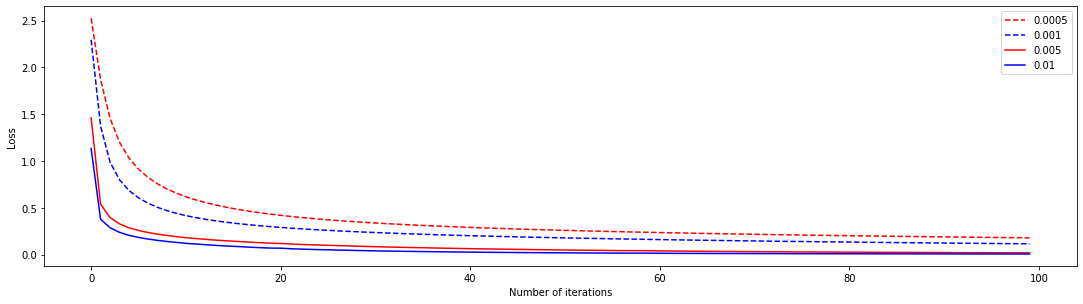

In [11]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(100), mlp0.loss_curve_, linestyle='dashed', 
        color="red", label=str(lrs[0]))
ax.plot(np.arange(100), mlp1.loss_curve_, linestyle='dashed', 
        color="blue", label=str(lrs[1]))
ax.plot(np.arange(100), mlp2.loss_curve_, linestyle='solid', 
        color="red", label=str(lrs[2]))
ax.plot(np.arange(100), mlp3.loss_curve_, linestyle='solid', 
        color="blue", label=str(lrs[3]))
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
ax.legend()

### Problem 2.4: Tuning a Neural Network (30 points)

As you saw in Problem 2.2, there are many hyperparameters of a neural network that can possibly be tuned in order to try to maximize the accuracy of your model. For the final problem of this assignment, it is your job to tune these hyperparameters.

For example, some hyperparameters you might choose to tune are:
- Learning rate
- Depth/width
- Regularization strength
- Activation functions
- Batch size
- etc.

To do this, you should train a network on the training data `X_tr` and evaluate its performance on the validation set `X_val` -- your goal is to achieve the highest possible accuracy on `X_val` by changing the network hyperparameters. **Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. This was already set up for you in Problem 2.3.

To receive full credit for this problem, you will need to tune your network hyperparameters until you achieve an error rate smaller than 5% on the validation data. However, tuning neural networks can be a difficult task, and you may not be able to achieve this target error rate. Hence, you will receive most of the credit for this problem as long as you train at least ten different neural networks with different settings of the hyperparameters.

In your answer, include a table listing the different hyperparameters that you tried, along with the resulting accuracy on the training and validation sets `X_tr` and `X_val`. Indicate which of these hyperparameter settings you would choose for your final model, and report the accuracy of this final model on the testing set `X_te`.

In [12]:
import itertools

lrs = [0.001, 0.005, 0.01]
alphas = [0.0001, 0.001, 0.01]
solvers = ["adam", "sgd"]
batch_sizes = [256, 512]
hidden_layer_sizes = [64, 128]

best_score = 0
best_param = None

print("solver, learning rate, alpha, batch_size, hidden_layer_size")

combinations = itertools.product(solvers, lrs, alphas, 
                                 batch_sizes, hidden_layer_sizes)
for (solver, lr, alpha, batch_size, hidden_layer_size) in combinations:
    mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), 
                        activation="relu", solver=solver, alpha=alpha, 
                        learning_rate_init=lr, batch_size=batch_size, 
                        random_state=seed).fit(X_tr, y_tr)
    score = accuracy_score(y_val, mlp.predict(X_val))
    print("NN %s have accuracy %f" % ((solver, lr, alpha, batch_size, 
                                       hidden_layer_size), score))

    if score > best_score:
        best_param = (solver, lr, alpha, batch_size, hidden_layer_size)
        best_score = score
    if score > 0.95:
      break

solver, lr, alpha, batch_size, hidden_layer_size = best_param
print("best parameter set is solver=%s, lr=%f, alpha=%f, \
        batch_size=%d, hidden_layer_size=%d" % 
      (solver, lr, alpha, batch_size, hidden_layer_size))
print("best accuray is", best_score)
print()

mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), 
                    activation="relu", solver=solver, alpha=alpha, 
                    learning_rate_init=lr, batch_size=batch_size, 
                    random_state=seed).fit(X_tr, y_tr)
final = accuracy_score(y_te, mlp.predict(X_te))
print("final accuracy on the testing data =", final)

solver, learning rate, alpha, batch_size, hidden_layer_size
NN ('adam', 0.001, 0.0001, 256, 64) have accuracy 0.945600
NN ('adam', 0.001, 0.0001, 256, 128) have accuracy 0.947300
NN ('adam', 0.001, 0.0001, 512, 64) have accuracy 0.943000
NN ('adam', 0.001, 0.0001, 512, 128) have accuracy 0.946000
NN ('adam', 0.001, 0.001, 256, 64) have accuracy 0.946100
NN ('adam', 0.001, 0.001, 256, 128) have accuracy 0.948100
NN ('adam', 0.001, 0.001, 512, 64) have accuracy 0.943600
NN ('adam', 0.001, 0.001, 512, 128) have accuracy 0.946700
NN ('adam', 0.001, 0.01, 256, 64) have accuracy 0.947700
NN ('adam', 0.001, 0.01, 256, 128) have accuracy 0.950400
best parameter set is solver=adam, lr=0.001000, alpha=0.010000, batch_size=256, hidden_layer_size=128
best accuray is 0.9504

final accuracy on the testing data = 0.947


---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. If you did not collaborate with anyone, you should write something like "I completed this assignment without any collaboration."

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I completed this assignment without any collaboration.